# Overview of Cars24 Project

This project aims to develop a machine learning model that accurately predicts the resale value of used cars based on a set of input parameters. The model takes into account various factors that influence a car's value, providing a data-driven approach to car valuation.

**Key Features:**

- Data-Driven Valuation:
  - The model uses historical data on car sales to learn patterns and relationships between various features and selling prices.
- Multiple Input Parameters:
  - The prediction is based on a comprehensive set of car attributes, including: Kilometers driven, Mileage, Engine, Make and Model etc.
- Machine Learning Algorithm:
  - The project likely employs a Multi Linear regression algorithm, to predict the continuous value of the car's selling price

## Data Preprocessing

In [ ]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

: 

In [ ]:
# load data
!gdown 1qXoDeYVC4vhd7xTNwohxh9dMCjjtoHoJ


Downloading...
From: https://drive.google.com/uc?id=1qXoDeYVC4vhd7xTNwohxh9dMCjjtoHoJ
To: /content/cars24-car-price-cleaned-new.csv
100% 1.55M/1.55M [00:00<00:00, 120MB/s]


In [ ]:
# read data
df = pd.read_csv('cars24-car-price-cleaned-new.csv')
df.head()

,selling_price,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.20,120000,19.70,796.0,46.30,11.0,MARUTI,ALTO STD,1,0,0,0,0,1,1,1,0
1,5.50,20000,18.90,1197.0,82.00,7.0,HYUNDAI,GRAND I10 ASTA,1,0,0,0,0,1,1,1,0
2,2.15,60000,17.00,1197.0,80.00,13.0,HYUNDAI,I20 ASTA,1,0,0,0,0,1,1,1,0
3,2.26,37000,20.92,998.0,67.10,11.0,MARUTI,ALTO K10 2010-2014 VXI,1,0,0,0,0,1,1,1,0
4,5.70,30000,22.77,1498.0,98.59,8.0,FORD,ECOSPORT 2015-2021 1.5 TDCI TITANIUM BSIV,0,0,1,0,0,0,1,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19820 entries, 0 to 19819
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   selling_price     19820 non-null  float64
 1   km_driven         19820 non-null  int64  
 2   mileage           19820 non-null  float64
 3   engine            19820 non-null  float64
 4   max_power         19820 non-null  float64
 5   age               19820 non-null  float64
 6   make              19820 non-null  object 
 7   model             19820 non-null  object 
 8   Individual        19820 non-null  int64  
 9   Trustmark Dealer  19820 non-null  int64  
 10  Diesel            19820 non-null  int64  
 11  Electric          19820 non-null  int64  
 12  LPG               19820 non-null  int64  
 13  Petrol            19820 non-null  int64  
 14  Manual            19820 non-null  int64  
 15  5                 19820 non-null  int64  
 16  >5                19820 non-null  int64 

In [ ]:
df['model'].nunique(), df['make'].nunique()

(3233, 41)

In [ ]:
# Spliting the data into train and test set

from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.3, random_state=1)

In [ ]:
df_train.shape

(13874, 17)

In [ ]:
df_test.shape

(5946, 17)

In [ ]:
# Target Encoding for Categorical Features
# We are using only train data for encoding to avoid data leakage

make_category_wise_mean = df_train.groupby('make')['selling_price'].mean()
model_category_wise_mean = df_train.groupby('model')['selling_price'].mean()


In [ ]:
df_train['make'] = df_train.groupby('make')['selling_price'].transform('mean')
df_train['model'] = df_train.groupby('model')['selling_price'].transform('mean')

In [ ]:
df_test['make'] = df_test['make'].map(make_category_wise_mean)
df_test['model'] = df_test['model'].map(model_category_wise_mean)

In [ ]:
# There is a chance that a model of car is present in test dataset but not in train dataset
df_test.isna().sum()

,0
selling_price,0
km_driven,0
mileage,0
engine,0
max_power,0
age,0
make,5
model,468
Individual,0
Trustmark Dealer,0


In [ ]:
# Encoding NaN values with global mean
global_mean = df_train['selling_price'].mean()

df_test['make'] = df_test['make'].fillna(global_mean)
df_test['model'] = df_test['model'].fillna(global_mean)

In [ ]:
# From the shape we know there are total 17 Columns ( Features ).
# Among them output data, y is the column selling_price
# Remaining Columns are the input data, X

y_train = df_train['selling_price']
X_train = df_train.drop('selling_price', axis=1)
y_train.shape, X_train.shape

((13874,), (13874, 16))

In [ ]:
y_test = df_test['selling_price']
X_test = df_test.drop('selling_price', axis=1)
y_test.shape, X_test.shape

((5946,), (5946, 16))

In [ ]:
# Scaling the data using Normalization because km_driven is in the ranges of 10k while age is in the range of 10s

# fit_transform() is for training data where both fitting and transforming happen in one step.
# transform() is for new data (test or unseen data) where only the transformation occurs based on previously learned parameters.
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns= X_test.columns)

In [ ]:
X_train.head()

,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,0.001163,0.182500,0.118335,0.077778,0.24,0.164123,0.139801,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
1,0.005637,0.110086,0.443276,0.413027,0.20,0.805756,1.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.013007,0.136810,0.216380,0.126892,0.16,0.164123,0.348682,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.027220,0.103103,0.373667,0.091948,0.32,0.301690,0.253502,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.013600,0.154310,0.206754,0.134879,0.36,0.204876,0.201272,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [ ]:
# Univariate ( Considering Only One Feature )
X1_train = X_train[['model']] # taking model feature
X1_test = X_test[['model']]

## Linear Regression

In [ ]:
# y = mx + c
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# this model find the relation between my X,y and gives m and c
# In this case it finds the relation between car model and selling_price
model.fit(X1_train, y_train) # this model gives m ( coeff ) and c ( intercept )

LinearRegression()

In [ ]:
model.coef_, model.intercept_

(array([20.5775]), 0.32500000000000373)

In [ ]:
# Predicting the Values
y_hat = model.predict(X_test[['model']])
y_hat

array([ 6.56636418,  4.69931034,  6.        , ...,  1.27888889,
        3.225     , 11.17125   ])

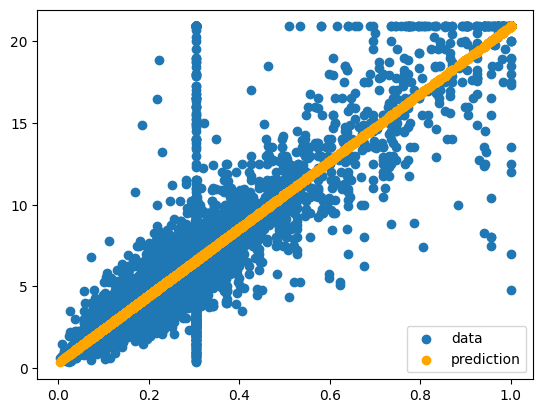

In [ ]:
fig = plt.figure()
plt.scatter(X_test[['model']],y_test,label='data')
plt.scatter(X_test[['model']],y_hat,color='orange',label='prediction')
plt.legend()
plt.show()

## Multi Linear Regression

In [ ]:
# Multi features
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
# we get coefficient for each column/feature and it tell importance of each feature
# bigger the coefficient, then that feature is more important ( dont consider the +, - sign)
model.coef_, model.intercept_

(array([-4.71057125, -4.68059256,  1.3377762 ,  0.84509313, -4.28612436,
         1.29641758, 17.88442049, -0.14268923, -0.13938682,  0.11076569,
         2.74816552,  0.29897844, -0.14519975, -0.0808793 , -0.27055329,
        -0.41622693]),
 2.610005287725095)

In [ ]:
y_hat = model.predict(X_test)
y_hat

array([ 5.35322877,  4.77243888,  6.27509709, ...,  1.12455962,
        2.82130867, 11.02249076])

## Evaluation Metrics

In [ ]:
# Option 1
from sklearn.metrics import r2_score
test_accuracy = r2_score(y_test, y_hat)
print("Test Accuracy (R-squared)", test_accuracy)

Test Accuracy (R-squared) 0.8019230466998656


In [ ]:
# LinearRegression's default .score() function uses R2 score to evaluate the data.
print("Train Accuracy (R-squared)", model.score(X_train, y_train))

Train Accuracy (R-squared) 0.9485893510587335


In [ ]:
print("Test Accuracy (R-squared)", model.score(X_test, y_test))

Test Accuracy (R-squared) 0.8019230466998656


In [ ]:
y_hat = model.predict(X_test)
Adj_R = 1 - (1-model.score(X_test, y_test)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("Adjusted R-squared:", Adj_R )

Adjusted R-squared: 0.8040871163148425


## Model Interpretability

In [ ]:
model.coef_

array([-4.71057125, -4.68059256,  1.3377762 ,  0.84509313, -4.28612436,
        1.29641758, 17.88442049, -0.14268923, -0.13938682,  0.11076569,
        2.74816552,  0.29897844, -0.14519975, -0.0808793 , -0.27055329,
       -0.41622693])

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'km_driven'),
  Text(1, 0, 'mileage'),
  Text(2, 0, 'engine'),
  Text(3, 0, 'max_power'),
  Text(4, 0, 'age'),
  Text(5, 0, 'make'),
  Text(6, 0, 'model'),
  Text(7, 0, 'Individual'),
  Text(8, 0, 'Trustmark Dealer'),
  Text(9, 0, 'Diesel'),
  Text(10, 0, 'Electric'),
  Text(11, 0, 'LPG'),
  Text(12, 0, 'Petrol'),
  Text(13, 0, 'Manual'),
  Text(14, 0, '5'),
  Text(15, 0, '>5')])

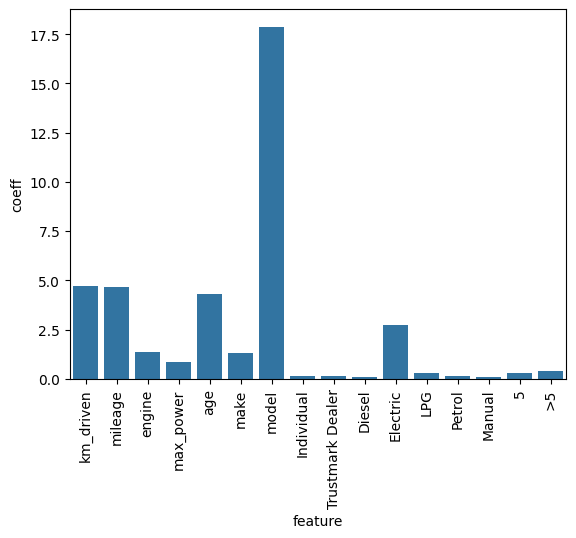

In [ ]:
import seaborn as sns

imp = pd.DataFrame(list(zip(X_test.columns,np.abs(model.coef_))),
                   columns=['feature', 'coeff'])
sns.barplot(x='feature', y='coeff', data=imp)
plt.xticks(rotation=90)

In [ ]:
X_test.columns[np.argmax(np.abs(model.coef_))]

'model'

In [ ]:
X_test.columns[np.argmin(np.abs(model.coef_))]

'Manual'

# Using Stats Model

In [ ]:
import statsmodels.api as sm

y_train = np.array(y_train)
X_sm = sm.add_constant(X_train)  # Statmodels default is without intercept, to add intercept we need to add constant.

model = sm.OLS(y_train, X_sm)
results = model.fit()

# Print the summary statistics of the model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                 1.598e+04
Date:                Mon, 04 Nov 2024   Prob (F-statistic):               0.00
Time:                        20:15:50   Log-Likelihood:                -20936.
No. Observations:               13874   AIC:                         4.191e+04
Df Residuals:                   13857   BIC:                         4.203e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                2.6100      0.173  

## Analysis

- Train Accuracy ( R-Squared ) - 0.9485893510587335
- Test Accuracy ( R-Squared ) - 0.8019230466998656
- Model is most important feauture followed by km_driven, mileage, age
- Least important feature is Manual
- From P value from OLS model we can remove the features which has p value > 0.05
- Features like petrol, Trustmark dealer, Diesel, LPG can be removed for predicting the car price